In [1]:
"""
updated 2019-08-05 
written by Minhae Kwon
Linear regression for "Encoding" Process
ref: https://chrisalbon.com/machine_learning/linear_regression/linear_regression_using_scikit-learn/
     https://datatofish.com/multiple-linear-regression-python/
"""

from pandas import DataFrame, read_csv
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

bb_df = read_csv('./data/bb_df.csv')
a_df = read_csv('./data/a_df.csv')
r_df = read_csv('./data/r_df.csv')


In [ ]:
# multiple linear regression with sklearn
regr = LinearRegression()
w = regr.fit(r_df, bb_df)
w.predict(r_df)

In [3]:
print('Intercept: ', w.intercept_) # bb_df = W r_df + w.intercept_

Intercept:  [6.78737905e-02 2.02116461e+11]


In [4]:
print('Coefficients: ', w.coef_) # W = w.coef_ 

Coefficients:  [[-2.63024643e-03  1.47251295e-02 -7.99076491e-03  4.76378543e-02
  -5.06626559e-02 -8.70865619e-05  2.50518191e-03  6.47891036e-02
   6.46647418e-03  2.67782300e-02  2.38851309e-03 -4.37532668e-02
   1.26489212e-02  2.80386146e-03 -2.77126014e-02 -3.88359826e-02
  -4.39653150e-02  2.06435179e-02 -4.17744036e-02 -1.39738107e-02
   6.68851995e-02  1.45525697e-02  4.06179586e-02  1.89076990e-02
  -2.91992203e-02 -6.77746816e-04  5.90493681e-02  3.91435354e-02
  -3.77016152e-02 -1.72818179e-02 -1.95460330e-02 -4.88191736e-02
   1.79085428e-02  2.85759194e-02  1.19962432e-02 -3.59345320e-03
  -1.94176373e-02  1.90232293e-02  4.75038977e-02 -2.86044663e-02
   2.01024973e-02  2.54665719e-02  4.60588272e-02 -2.56646141e-02
  -2.39407255e-02 -7.74397866e-03 -3.35302409e-03 -3.17426431e-02
   1.52771260e-02  2.08242187e-02 -3.19777594e-02 -3.67502315e-02
  -1.77956002e-03  2.46522219e-02  2.60114946e-02 -4.49698919e-02
   1.36798259e-02 -2.17190541e-01  4.78398989e-03 -1.94586215

In [28]:
nb= w.predict(r_df) #neural estimate of belief
nb_df = DataFrame(nb, columns = bb_df.columns)


In [20]:
encoding_error = bb_df.to_numpy() - nb_df.to_numpy()
print('mean encoding error mean: \n', np.mean(encoding_error, axis=0))
print('mean encoding error std:\n', np.std(encoding_error, axis=0))

mean encoding error mean: 
 [7.43604627e-17 5.06900862e-05]
mean encoding error std:
 [5.72466791e-16 1.45860229e-01]


In [ ]:
#save neural estimate belief
nb_df.to_csv(path_or_buf='./data/nb_df.csv',index=False)

In [29]:
nb_df

,behavior_belief1,behavior_belief2
0,0.008271,0.210114
1,-0.052504,0.805084
2,0.602757,0.609283
3,0.348709,0.645111
4,0.758729,0.815491
5,0.341709,0.866516
6,0.344556,0.658508
7,0.341448,0.648132
8,0.115921,0.660797
9,0.114506,0.889557


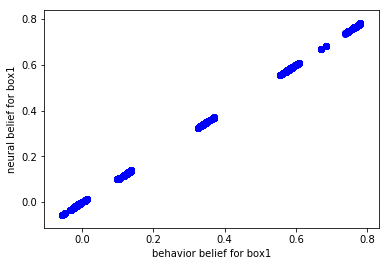

In [31]:

# plot: compare raw data vs prediction
plt.scatter(bb_df['behavior_belief1'], nb_df['behavior_belief1'], c='blue')
plt.xlabel('behavior belief for box1')
plt.ylabel('estimated neural belief for box1')
plt.title('Encoding')
plt.show()

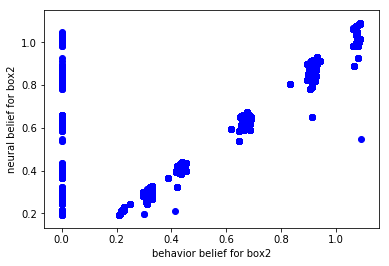

In [32]:
plt.scatter(bb_df['behavior_belief2'], nb_df['behavior_belief2'], c='blue')
plt.xlabel('behavior belief for box2')
plt.ylabel('estimated neural belief for box2')
plt.title('Encoding')
plt.show()

In [ ]:
"""
import matplotlib.pyplot as plt
# plot: compare raw data vs prediction
lin_regplot(X, y, regr)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plot.show()



def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    retrun None

"""
"""    
import statsmodels.api as sm
# with statsmodels
X = r_df
Y = bb_df
X = sm.add_constant(X) #adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)
"""